In [1]:
import seaborn as sns

In [2]:
import sys
print(sys.executable)

C:\Users\mgolmohamadi\anaconda3\python.exe


In [3]:
import pandas as pd
import numpy as np

In [5]:
from zipfile import ZipFile, Path
import glob

In [6]:
with ZipFile("dataset.zip","r") as zip_ref:
    zip_ref.extractall("dataset")

In [20]:
import os 
list_of_names = os.listdir('dataset/Annotated Data')
print(list_of_names)

['BSC', 'CHU', 'CSI', 'CSO', 'FKL', 'FOL', 'JOG', 'JUM', 'SBE', 'SBW', 'SCH', 'SDL', 'SIT', 'SLH', 'SLW', 'SRH', 'STD', 'STN', 'STU', 'WAL']


In [36]:
dataframes_list = []
path = 'dataset/Annotated Data/'+list_of_names[0]
files = glob.glob(path +'/'+ '*.csv')


In [37]:
dataframes_list = []
path = 'dataset/Annotated Data/'+list_of_names[0]
files = glob.glob("path/*.csv")
for i in range(len(list_of_names)):
    path = 'dataset/Annotated Data/'+list_of_names[i]
    temp_df = pd.concat(map(pd.read_csv, glob.glob(path +'/'+ '*.csv')), axis = 0, join = 'inner')
    dataframes_list.append(temp_df)

In [78]:
def set_index(dataframes_list):
    df_list = []
    for df in dataframes_list:
    
        new_index = pd.RangeIndex(1, len(df) + 1)
        df_list.append(df.set_index(new_index))
    return df_list
df_list = set_index(dataframes_list)


In [79]:
for df in df_list:
        df['sum'] = np.sqrt(df['acc_x'] **2 + df['acc_y']**2 + df['acc_z']**2)

# Magnitude Plots


#### 1. BSC: Fall backward while trying to sit on a chair 

(0.0, 5.0)

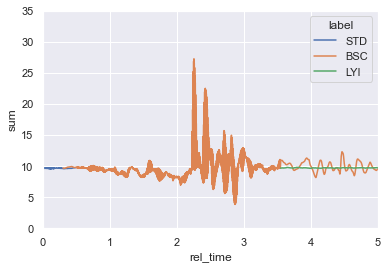

In [83]:
sns.set()
sns.lineplot(x="rel_time", y="sum", hue="label", markers=True, data=df_list[0])
plt.ylim(0, 35)
plt.xlim(0, 5)


#### 2. FOL: Fall Forward from standing, use of hands to dampen fall 

(0.0, 5.0)

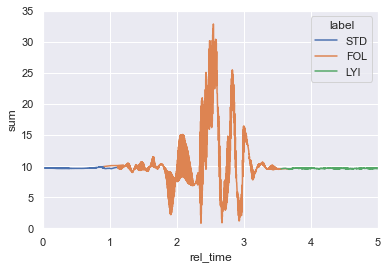

In [87]:
sns.set()
sns.lineplot(x="rel_time", y="sum", hue="label", markers=True, data=df_list[5])
plt.ylim(0, 35)
plt.xlim(0, 5)

#### 3. Jump

(0.0, 5.0)

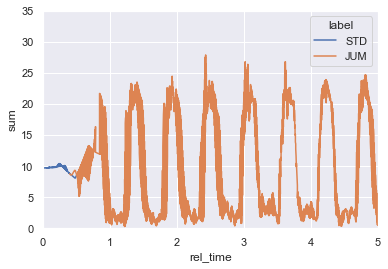

In [95]:
sns.set()
sns.lineplot(x="rel_time", y="sum", hue="label", markers=True, data=df_list[7])
plt.ylim(0, 35)
plt.xlim(0, 5)

#### 4. Car step in

(0.0, 5.0)

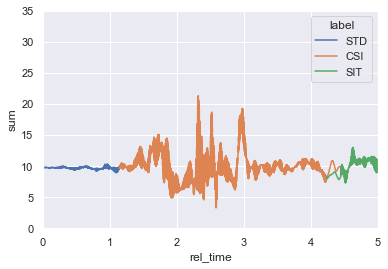

In [88]:
sns.set()
sns.lineplot(x="rel_time", y="sum", hue="label", markers=True, data=df_list[2])
plt.ylim(0, 35)
plt.xlim(0, 5)

#### 5. Sit

(0.0, 5.0)

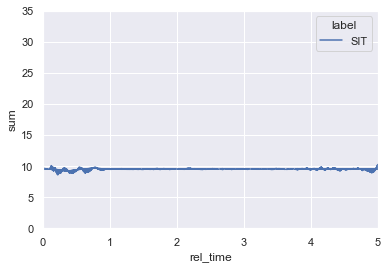

In [97]:
sns.set()
sns.lineplot(x="rel_time", y="sum", hue="label", markers=True, data=df_list[12])
plt.ylim(0, 35)
plt.xlim(0, 5)

# BoxPlot

[(0.0, 35.0)]

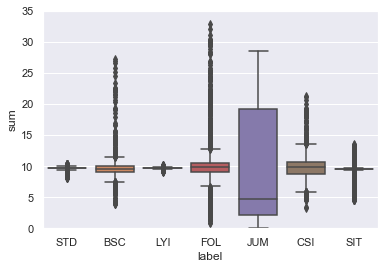

In [99]:
cdf = pd.concat([df_list[0], df_list[5], df_list[7], df_list[2], df_list[12]])
ax= sns.boxplot(x='label', y='sum', data=cdf)
ax.set(ylim=(0, 35))